<h2> 1.1 Description </h2>

<p style='font-size:18px'><b><h2>1.2 Description</h2></b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Analysis of tags and quality of questions posted on Stack Overflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate</p>

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Analysing the most demanding question topic asked on stack overfllow.<br>
2. Low quality questions analysis and differentiate it with high quality questions

<h3>Data Field Explaination</h3>
This dataset has 45,295 rows and 6 columns<br>
<u style="font-weight:bold;">Id</u>(integer) - id of the question asked.<br>
<u style="font-weight:bold;">Title</u>(string) - Discreption of questions.<br>
<u style="font-weight:bold;">Body</u>(string) - Content of questions.<br>
<u style="font-weight:bold;">Tags</u>(string) - languages and concepts used in the questions.<br>
<u style="font-weight:bold;">CreationDate</u>(string) - date of creation of the questions.<br>
<u style="font-weight:bold;">Quality</u>(string) - quality of the questions.

<h3>Dataset classification</h3>
Questions are classified into three categories:<br><br>
1. <b>HQ:</b>High-quality posts without a single edit.<br>
2. <b>LQ_EDIT:</b> Low-quality posts with a negative score, and multiple community edits. However, they still remain open after those changes.<br>
3. <b>LQ_CLOSE:</b> Low-quality posts that were closed by the community without a single edit.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('dataset.csv')
df.columns = train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [39]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (45000, 6)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            45000 non-null  int64 
 1   title         45000 non-null  object
 2   body          45000 non-null  object
 3   tags          45000 non-null  object
 4   creationdate  45000 non-null  object
 5   y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [41]:
df.head()

,id,title,body,tags,creationdate,y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [54]:
df['tags'] = df['tags'].str.replace('>',' ')
df['tags'] = df['tags'].str.replace('<','')

In [55]:
df.head()

,id,title,body,tags,creationdate,y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react-native opacity,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary-operator op...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material-design floating-action-button,2016-01-01 05:21:48,HQ


In [56]:
df.tags.value_counts()[:15]

python                798
java                  761
javascript            660
c#                    531
c++                   521
c                     435
php                   423
android               392
html css              306
javascript jquery     273
python python-3.x     272
java android          263
r                     226
javascript html       198
php mysql             191
Name: tags, dtype: int64

In [67]:
tags = train[['tags']]
tags = pd.concat([tags[['tags']], tags['tags'].str.split(' ', expand = True)], axis = 1)
tags = tags.drop('tags', axis = 1)
tags.head()

,0
0,<java><repeat>
1,<java><optional>
2,<javascript><image><overlay><react-native><opa...
3,<swift><operators><whitespace><ternary-operato...
4,<android><material-design><floating-action-but...


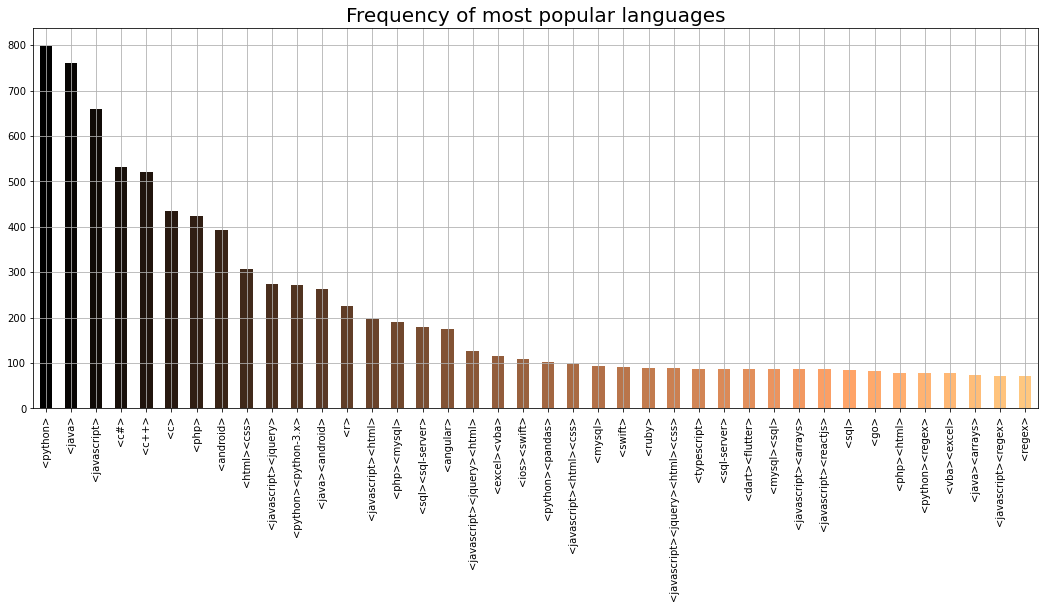

In [68]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
tags[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most popular languages', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [45]:
df.y.value_counts()[:]

LQ_EDIT     15000
HQ          15000
LQ_CLOSE    15000
Name: y, dtype: int64

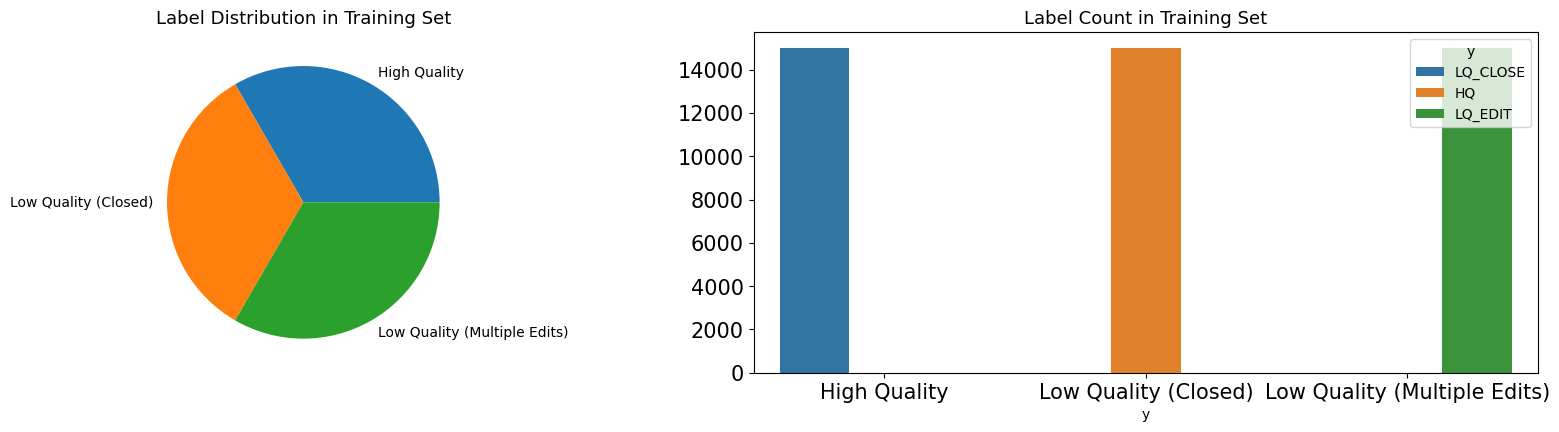

In [46]:
fig, axes = plt.subplots(ncols = 2, figsize = (17, 4), dpi = 100)
plt.tight_layout()

df.groupby('y').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
sns.countplot(x = train['y'], hue = train['y'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
axes[0].tick_params(axis = 'x', labelsize = 15)
axes[0].tick_params(axis = 'y', labelsize = 15)
axes[1].tick_params(axis = 'x', labelsize = 15)
axes[1].tick_params(axis = 'y', labelsize = 15)

axes[0].set_title('Label Distribution in Training Set', fontsize = 13)
axes[1].set_title('Label Count in Training Set', fontsize = 13)

plt.show()

In [30]:
def get_class_feature(df, cls, feature):
    """
    Extract featuers by class
    Returns new dataframe with respective class
    """
    return df.loc[df['y'] == cls, feature]

In [31]:
df['title_len'] = df.title.apply(len)
lq_close = get_class_feature(df, 'LQ_CLOSE', 'title_len')
lq_edit = get_class_feature(df, 'LQ_EDIT', 'title_len')
hq = get_class_feature(df, 'HQ', 'title_len')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

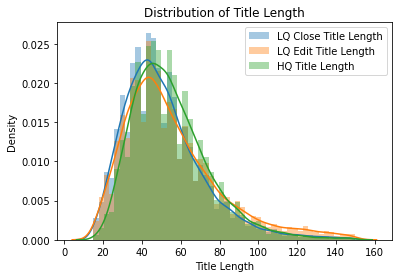

In [34]:
sns.distplot(lq_close, label='LQ Close Title Length')
sns.distplot(lq_edit, label='LQ Edit Title Length')
sns.distplot(hq, label='HQ Title Length')
plt.title('Distribution of Title Length')
plt.ylabel('Density')
plt.xlabel('Title Length')
plt.legend()
plt.show()

In [36]:

df['tags_len'] = df.body.apply(len)
lq_close = get_class_feature(df, 'LQ_CLOSE', 'tags_len')
lq_edit = get_class_feature(df, 'LQ_EDIT', 'tags_len')
hq = get_class_feature(df, 'HQ', 'tags_len')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

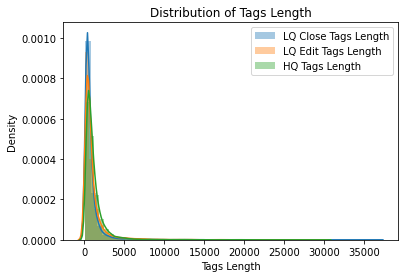

In [37]:
sns.distplot(lq_close, label='LQ Close Tags Length')
sns.distplot(lq_edit, label='LQ Edit Tags Length')
sns.distplot(hq, label='HQ Tags Length')
plt.title('Distribution of Tags Length')
plt.ylabel('Density')
plt.xlabel('Tags Length')
plt.legend();